In [1]:
import numpy as np
import pandas as pd
import pathlib as pl
from datetime import datetime
import matplotlib.pyplot as plot
from pandas import DataFrame, Series
import seaborn as sb
# read .xlsx files under ./data directory into datatables.

In [5]:
datapath=pl.Path("/home/techstar/data/pyprojects/SHDK_828/6-8月数据")

In [6]:
# read from csv files

#datapath=pl.Path("./6-8月数据")

file_list=[]
dfs=[]
for x in datapath.glob("*.csv"):
    if x.name.find("HaiLu")==-1:
        print("Reading "+x.name)
        f=pd.read_csv(x,index_col=0,na_values=" ")
        dfs.append(f)
        file_list.append(x.name)

Reading ChangLiu3.csv
Reading ChangLiu2.csv
Reading WanKe1.csv
Reading WanKe2.csv
Reading ChangLiu4.csv
Reading ChangLiu1.csv


In [7]:
datapath=pl.Path("/home/techstar/data/pyprojects/SHDK_828/数据导出/数据导出")

In [8]:
file_list

['ChangLiu3.csv',
 'ChangLiu2.csv',
 'WanKe1.csv',
 'WanKe2.csv',
 'ChangLiu4.csv',
 'ChangLiu1.csv']

In [9]:
# read from csv files

#datapath=pl.Path("./data_Jun_Aug")

for x in datapath.glob("*-I.csv"):
    print("Reading "+x.name)
    f=pd.read_csv(x,index_col=0,na_values=" ")
    dfs.append(f)
    file_list.append(x.name)

Reading jiangchuan1-I.csv
Reading jiangchuan3-I.csv
Reading jiangchuan5-I.csv
Reading QinZhou3-I.csv
Reading jiangchuan2-I.csv
Reading KunYang3-I.csv
Reading KunYang1-I.csv
Reading QinZhou4-I.csv
Reading jiangchuan4-I.csv


In [97]:
cols = ["Avg[V 有效值 AB]",
# "Avg[V 总谐波畸变率 A]",
 "Avg[V 负序不平衡 Total]",
 "Avg[V SPOS All]",
 "Avg[V SNEG All]",
 "Avg[V SZERO All]",
#"Pst A",
 "Avg[I 有效值 A]",
 "Avg[I 总谐波畸变率 A]",
 "Avg[I 负序不平衡 Total]",
 "Avg[I SPOS All]",
 "Avg[I SNEG All]",
 "Avg[I ZERO All]",
# "Avg[P A]",
# "Avg[Q A]",
# "Avg[S A]",
# "Avg[功率因数 A]"
 ]

In [10]:
tr_data=DataFrame()
i=0
for df in dfs:
    for c in df.columns:
        if c.find("Avg[I 有效值 A]")!=-1:
            print (c)
            tr_data[c]=df[c]
            i+=1
print(i)
           

 Changliu3 - Avg[I 有效值 A] (A)
 Changliu2 - Avg[I 有效值 A] (A)
 WanKe1 - Avg[I 有效值 A] (A)
 WanKe2 - Avg[I 有效值 A] (A)
 Changliu1 - Avg[I 有效值 A] (A)
 JiangChuan1 - Avg[I 有效值 A] (A)
 JiangChuan3 - Avg[I 有效值 A] (A)
 JiangChuan5 - Avg[I 有效值 A] (A)
 QinZhou3 - Avg[I 有效值 A] (A)
 JiangChuan2 - Avg[I 有效值 A] (A)
 KunYang3 - Avg[I 有效值 A] (A)
 KunYang1 - Avg[I 有效值 A] (A)
 QinZhou4 - Avg[I 有效值 A] (A)
 JiangChuan4 - Avg[I 有效值 A] (A)
14


In [11]:
train_data=tr_data.dropna()

In [12]:
len(train_data)

42612

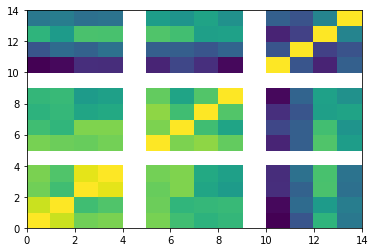

In [13]:
corMat=DataFrame(train_data.corr())
plot.pcolor(corMat)
plot.show()

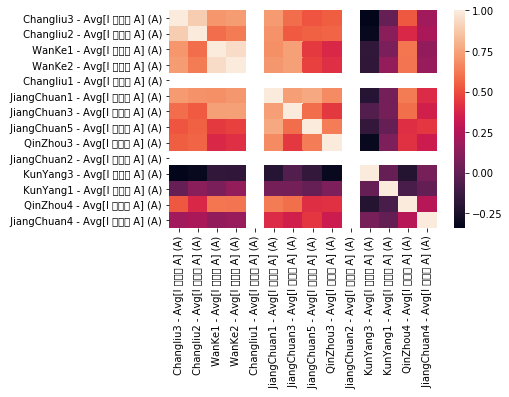

In [14]:
sb.heatmap(corMat)
plot.show()

In [21]:
train_data.describe()

,Changliu3 - Avg[V 有效值 A] (V),Changliu2 - Avg[V 有效值 A] (V),WanKe1 - Avg[V 有效值 A] (V),WanKe2 - Avg[V 有效值 A] (V),Changliu4 - Avg[V 有效值 A] (V),Changliu1 - Avg[V 有效值 A] (V),JiangChuan1 - Avg[V 有效值 A] (%),JiangChuan3 - Avg[V 有效值 A] (%),JiangChuan5 - Avg[V 有效值 A] (%),QinZhou3 - Avg[V 有效值 A] (%),JiangChuan2 - Avg[V 有效值 A] (%),QinZhou4 - Avg[V 有效值 A] (%),KunYang3 - Avg[V 有效值 A] (%),KunYang1 - Avg[V 有效值 A] (%),JiangChuan4 - Avg[V 有效值 A] (%)
count,42612.000000,42612.000000,42612.000000,42612.000000,42612.000000,42612.000000,42612.000000,42612.000000,42612.000000,42612.000000,42612.000000,42612.000000,42612.000000,42612.000000,42612.000000
mean,66237.999129,66384.885992,92.990053,5967.087461,66245.061446,66413.083645,103.089335,101.092428,103.619719,105.332239,104.036494,104.714655,171.274409,103.498970,104.930787
std,615.291229,526.108641,0.985631,69.217656,615.615796,526.182692,6.443130,1.277957,1.161793,0.739720,0.808442,1.232280,113.844681,1.150903,0.961845
min,64784.941406,65110.730469,89.247429,5797.876465,64791.621094,65138.785156,0.000000,97.374131,100.331266,102.807626,100.918642,101.746432,79.396228,73.086146,102.205245
25%,65788.533203,65966.785156,92.308889,5917.949951,65795.490234,65994.435547,102.777098,100.171339,102.822645,104.782509,103.503629,103.752425,102.965452,102.639171,104.208180
50%,66268.683594,66385.902344,92.936508,5964.658691,66275.867188,66414.210938,103.477088,101.093713,103.645819,105.404231,104.040146,104.825888,104.160770,103.548270,104.905780
75%,66769.218750,66818.779297,93.657230,6022.880005,66776.423828,66847.125000,104.192214,102.074655,104.567223,105.893345,104.652669,105.678371,354.641250,104.427938,105.689438
max,67534.031250,68161.250000,95.808167,6117.668945,67542.132812,68190.742188,106.328250,106.044602,106.567451,108.494927,106.127464,107.357456,370.811780,106.046145,107.594213


In [7]:
from sklearn.model_selection import train_test_split
train,test= train_test_split(train_data,test_size=0.2,random_state=0)

In [8]:
M= train.mean()
Std = train.std()

In [9]:
train_s=(train-M)/Std
test_s=(test-M)/Std

In [27]:
#  generate X_train,Y_train,X_test,Y_test for all target features
X_train=train_s.copy();Y_train=DataFrame()

for c in train_s.columns:
    if c.find("KunYang1") !=-1 :
        Y_train[c]=train_s[c]
        X_train=X_train.drop(c,axis=1)

        
X_test=test_s.copy();Y_test=DataFrame()

for c in test_s.columns:
    if c.find("KunYang1") !=-1 :
        Y_test[c]=test_s[c]
        X_test=X_test.drop(c,axis=1)

In [28]:
###### network from keras for SHDKY data simulation ###########
from keras.models import Sequential
from keras.layers import Dense, Activation,Input
import keras


model = Sequential()

model.add(Dense(8, input_dim=8,init="normal"))
model.add(Activation('tanh'))
model.add(Dense(6, activation='tanh',init="normal"))
model.add(Dense(1, activation='linear',init="normal"))

 


/home/techstar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, input_dim=8, kernel_initializer="normal")`
  if __name__ == '__main__':
/home/techstar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="tanh", kernel_initializer="normal")`
  # This is added back by InteractiveShellApp.init_path()
/home/techstar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", kernel_initializer="normal")`
  if sys.path[0] == '':


In [29]:
model.compile(loss='mean_squared_error', 
              optimizer=keras.optimizers.SGD(lr=0.2))

In [31]:
model.fit(X_train, Y_train, epochs=30,batch_size=10,
          shuffle=True,verbose=2,validation_split=0.2)  

Train on 27296 samples, validate on 6825 samples
Epoch 1/30
 - 2s - loss: 0.3622 - val_loss: 0.3128
Epoch 2/30
 - 2s - loss: 0.3575 - val_loss: 0.2762
Epoch 3/30
 - 2s - loss: 0.3573 - val_loss: 0.3344
Epoch 4/30
 - 2s - loss: 0.3717 - val_loss: 0.2935
Epoch 5/30
 - 2s - loss: 0.3713 - val_loss: 0.3374
Epoch 6/30
 - 2s - loss: 0.3669 - val_loss: 0.3008
Epoch 7/30
 - 2s - loss: 0.3647 - val_loss: 0.2927
Epoch 8/30
 - 2s - loss: 0.3719 - val_loss: 0.2962
Epoch 9/30
 - 2s - loss: 0.3742 - val_loss: 0.2994
Epoch 10/30
 - 2s - loss: 0.3636 - val_loss: 0.2783
Epoch 11/30
 - 2s - loss: 0.3586 - val_loss: 0.3039
Epoch 12/30
 - 2s - loss: 0.3591 - val_loss: 0.3455
Epoch 13/30
 - 2s - loss: 0.3620 - val_loss: 0.2980
Epoch 14/30
 - 2s - loss: 0.3582 - val_loss: 0.2877
Epoch 15/30
 - 2s - loss: 0.3581 - val_loss: 0.2877
Epoch 16/30
 - 2s - loss: 0.3658 - val_loss: 0.4490
Epoch 17/30
 - 2s - loss: 0.3646 - val_loss: 0.3702
Epoch 18/30
 - 2s - loss: 0.3529 - val_loss: 0.3577
Epoch 19/30
 - 2s - loss

In [49]:
(model.predict(X_test)-Y_test)/Y_test

,WanKe1 - Avg[V 有效值 AB] (V)
时间,
2017-06-06 00:15:00,-0.071295
2017-06-26 20:15:00,-1.543686
2017-06-21 21:45:00,-0.014884
2017-06-04 10:45:00,-1.493933
2017-06-09 07:00:00,-2.434166
2017-06-01 08:30:00,-0.341035
2017-06-05 15:00:00,-0.467598
2017-06-27 06:15:00,0.099491
2017-06-19 04:00:00,-0.145898


In [15]:
Y_train

,Changliu3 - Avg[V 有效值 A] (V)
时间,
2017-06-21 03:39:00,1.242976
2017-08-09 14:00:00,-1.581354
2017-08-01 04:51:00,0.896351
2017-07-17 17:06:00,-0.402780
2017-08-31 14:12:00,-0.570351
2017-06-29 18:51:00,-0.214738
2017-07-11 00:57:00,0.930508
2017-06-04 09:24:00,-0.299067
2017-07-19 19:45:00,-1.199888


In [14]:
M

 Changliu3 - Avg[V 有效值 A] (V)      66239.215310
 Changliu2 - Avg[V 有效值 A] (V)      66385.198319
 WanKe1 - Avg[V 有效值 A] (V)            92.993566
 WanKe2 - Avg[V 有效值 A] (V)          5967.349035
 Changliu4 - Avg[V 有效值 A] (V)      66246.276386
 Changliu1 - Avg[V 有效值 A] (V)      66413.393866
 KunYang3 - Avg[V 有效值 A] (V)        9898.420824
 JiangChuan3 - Avg[V 有效值 A] (V)    64202.018849
 KunYang1 - Avg[V 有效值 A] (V)       20914.002418
dtype: float64

In [15]:
Std

 Changliu3 - Avg[V 有效值 A] (V)       617.089011
 Changliu2 - Avg[V 有效值 A] (V)       527.710888
 WanKe1 - Avg[V 有效值 A] (V)            0.986196
 WanKe2 - Avg[V 有效值 A] (V)           69.208721
 Changliu4 - Avg[V 有效值 A] (V)       617.415263
 Changliu1 - Avg[V 有效值 A] (V)       527.783519
 KunYang3 - Avg[V 有效值 A] (V)       6578.474288
 JiangChuan3 - Avg[V 有效值 A] (V)     810.844800
 KunYang1 - Avg[V 有效值 A] (V)        233.289743
dtype: float64

In [16]:
train.max()

 Changliu3 - Avg[V 有效值 A] (V)      67534.031250
 Changliu2 - Avg[V 有效值 A] (V)      68145.773438
 WanKe1 - Avg[V 有效值 A] (V)            95.808167
 WanKe2 - Avg[V 有效值 A] (V)          6113.998535
 Changliu4 - Avg[V 有效值 A] (V)      67542.132812
 Changliu1 - Avg[V 有效值 A] (V)      68175.429688
 KunYang3 - Avg[V 有效值 A] (V)       21404.712891
 JiangChuan3 - Avg[V 有效值 A] (V)    67347.367188
 KunYang1 - Avg[V 有效值 A] (V)       21429.019531
dtype: float64

In [17]:
train.min()

 Changliu3 - Avg[V 有效值 A] (V)      64784.941406
 Changliu2 - Avg[V 有效值 A] (V)      65110.730469
 WanKe1 - Avg[V 有效值 A] (V)            89.247429
 WanKe2 - Avg[V 有效值 A] (V)          5797.876465
 Changliu4 - Avg[V 有效值 A] (V)      64791.621094
 Changliu1 - Avg[V 有效值 A] (V)      65138.785156
 KunYang3 - Avg[V 有效值 A] (V)        4583.943359
 JiangChuan3 - Avg[V 有效值 A] (V)    61840.878906
 KunYang1 - Avg[V 有效值 A] (V)       14768.707031
dtype: float64

In [18]:
train.median()

 Changliu3 - Avg[V 有效值 A] (V)      66268.335938
 Changliu2 - Avg[V 有效值 A] (V)      66386.093750
 WanKe1 - Avg[V 有效值 A] (V)            92.938095
 WanKe2 - Avg[V 有效值 A] (V)          5964.761230
 Changliu4 - Avg[V 有效值 A] (V)      66275.476562
 Changliu1 - Avg[V 有效值 A] (V)      66414.250000
 KunYang3 - Avg[V 有效值 A] (V)        6013.958008
 JiangChuan3 - Avg[V 有效值 A] (V)    64203.542969
 KunYang1 - Avg[V 有效值 A] (V)       20923.894531
dtype: float64